Implementing a neural network with arbitrary hidden layers
After that I will visualize the intermediate layers(layer #n)
I will try to obtain the the different results as I change n

In [1]:
import numpy as np # Importing numpy
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.rcParams['figure.dpi']=300 

In [2]:
def apply_layer(y_in, w, b):
    z = np.dot(y_in, w) + b  # Changing the order of the dot product because of python broadcasting
    return (1 / (1 + np.exp(-z)))

In [3]:
Nlayers = 20  # number of layers
LayerSize = 100  # Layer size

WeightsFirst = np.random.uniform(low = -5, high = 5, size = [2, LayerSize])
BiasesFirst = np.random.uniform(low = -1, high = 1, size = LayerSize)

Weights = np.random.uniform(low = -10, high = 10, size = [Nlayers, LayerSize, LayerSize])
Biases = np.random.uniform(low = -5, high = 5, size = [Nlayers, LayerSize])

WeightsOut = np.random.uniform(low = -3, high = 3, size = [LayerSize, 1])
BiasesOut = np.random.uniform(low = -2, high = 2, size = 1)

In [4]:
def apply_multi_net(y_in):   # the function for multi-layer network
    global Nlayers, LayerSize, WeightsFirst, BiasesFirst, Weights, Biases, WeightsOut, BiasesOut
    
    y = apply_layer(y_in, WeightsFirst, BiasesFirst)
    for j in range(Nlayers):
        y = apply_layer(y, Weights[j, : , :], Biases[j, :])
    output = apply_layer(y, WeightsOut, BiasesOut)
    
    return output

In [5]:
def apply_multi_net_n(y_in, n):  # the function for multi-layer networks but it only calculates up to nth layer
    global Nlayers, LayerSize, WeightsFirst, BiasesFirst, Weights, Biases, WeightsOut, BiasesOut
    
    y = apply_layer(y_in, WeightsFirst, BiasesFirst)
    if n <= Nlayers:
        for j in range(n):
            y = apply_layer(y, Weights[j, : , :], Biases[j, :])
    elif n > Nlayers:
         for j in range(Nlayers):
            y = apply_layer(y, Weights[j, : , :], Biases[j, :])
    output = apply_layer(y, WeightsOut, BiasesOut)
    
    return output

In [6]:
M = 400  # Mesh size
batchSize = M ** 2
y_in = np.zeros([batchSize, 2])
v0, v1 = np.meshgrid(np.linspace(-0.1, 0.1, M), np.linspace(-0.1, 0.1, M))
y_in[ : , 0] = v0.flatten()
y_in[ : , 1] = v1.flatten()
#y_in

array([[-0.1       , -0.1       ],
       [-0.09949875, -0.1       ],
       [-0.09899749, -0.1       ],
       ...,
       [ 0.09899749,  0.1       ],
       [ 0.09949875,  0.1       ],
       [ 0.1       ,  0.1       ]])

In [7]:
# I use the MxM input grid that is initialized above
y_out = apply_multi_net(y_in)  # using the multi-layer network function to calculate the output
y_out_n = apply_multi_net_n(y_in, 17)
y_out_n2 = apply_multi_net_n(y_in, 13)
y_out_n3 = apply_multi_net_n(y_in, 9)
y_out_n4 = apply_multi_net_n(y_in, 5)
y_out_n5 = apply_multi_net_n(y_in, 1)

In [8]:
y_out_2D = np.reshape(y_out[ : , 0], [M, M]) # Reshaping the output into 2D mesh
y_out_n_2D = np.reshape(y_out_n[ : , 0], [M, M])
y_out_n2_2D = np.reshape(y_out_n2[ : , 0], [M, M])
y_out_n3_2D = np.reshape(y_out_n3[ : , 0], [M, M])
y_out_n4_2D = np.reshape(y_out_n4[ : , 0], [M, M])
y_out_n5_2D = np.reshape(y_out_n5[ : , 0], [M, M])

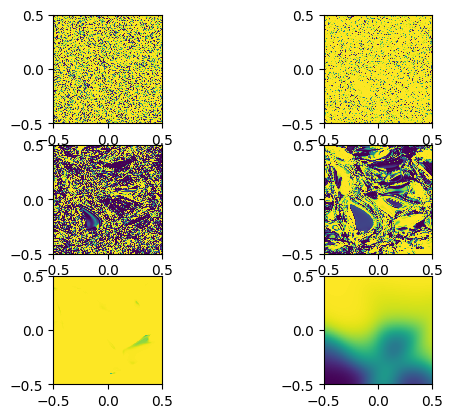

In [9]:
fig,ax=plt.subplots(3, 2)
ax[0][0].imshow(y_out_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest') # Plotting the NN usign matplotlib
ax[0][1].imshow(y_out_n_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
ax[1][0].imshow(y_out_n2_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
ax[1][1].imshow(y_out_n3_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
ax[2][0].imshow(y_out_n4_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
ax[2][1].imshow(y_out_n5_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
#plt.colorbar()
plt.show()

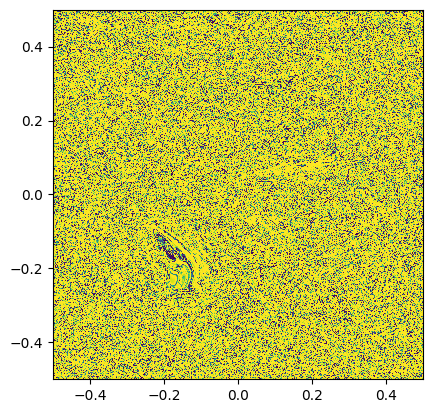

In [10]:
plt.imshow(y_out_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')

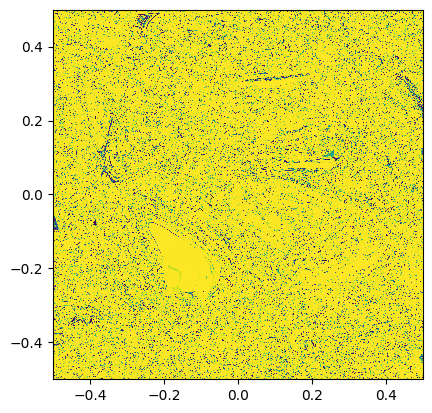

In [11]:
plt.imshow(y_out_n_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')

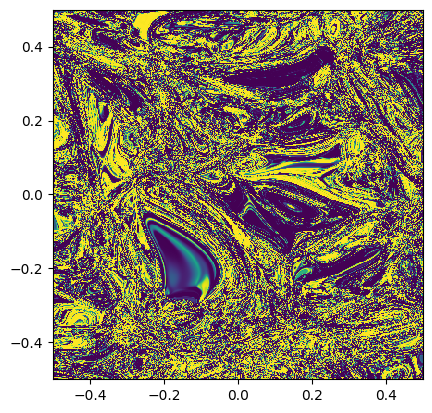

In [12]:
plt.imshow(y_out_n2_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')

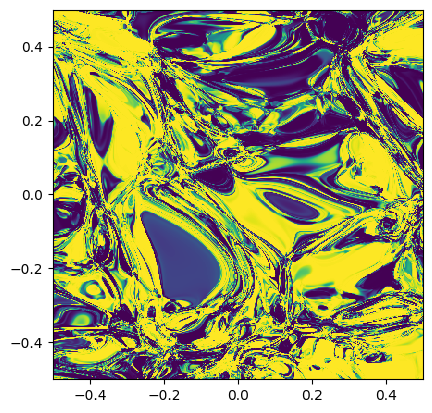

In [13]:
plt.imshow(y_out_n3_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')

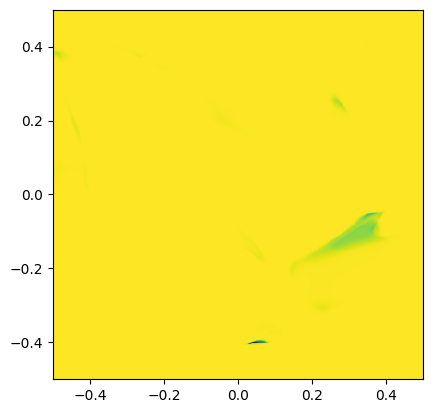

In [14]:
plt.imshow(y_out_n4_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')

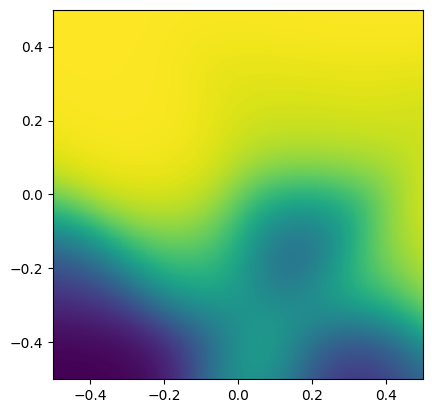

In [15]:
plt.imshow(y_out_n5_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')